In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("./lichess-sampled.parquet")
df.head()

,Event,Site,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,TimeControl,Termination,Moves,WhiteTitle,BlackTitle,LichessId,Date
0,Classical,https://lichess.org/a9tcp02g,Desmond_Wilson,savinka59,White,1654.0,1919.0,19.0,-22.0,D04,480+2,Normal,1. d4 d5 2. Nf3 Nf6 3. e3 Bf5 4. Nh4 Bg6 5. Nx...,NaN,NaN,<NA>,2012-12-31 23:04:12
1,Classical,https://lichess.org/iclkx584,Voltvolf,Marzinkus,White,1824.0,1811.0,11.0,-11.0,C02,360+6,Normal,1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Ne7 5. f4 cxd...,NaN,NaN,<NA>,2012-12-31 23:10:00
2,Classical,https://lichess.org/ufcqmfxx,6WX,adamsrj,White,1463.0,1504.0,62.0,-12.0,C44,1560+30,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. N...,NaN,NaN,<NA>,2012-12-31 23:16:04
3,Classical,https://lichess.org/qwuudn2s,sebastian44,jtkjtkful,Black,1347.0,1519.0,-6.0,23.0,B01,300+5,Time forfeit,1. e4 d5 2. e5 d4 3. Nf3 Nc6 4. c3 d3 5. Na3 f...,NaN,NaN,<NA>,2012-12-31 23:24:11
4,Classical,https://lichess.org/c9qfp8es,peter2,Killi,Black,1519.0,1572.0,-9.0,9.0,C28,480+0,Normal,1. e4 Nc6 2. Nc3 e5 3. Bc4 Nf6 4. d3 h6 5. f3 ...,NaN,NaN,<NA>,2013-01-01 00:51:20


# Counts of Games by Elo

In [12]:
elos = pd.concat([df.WhiteElo, df.BlackElo])
elo_counts = elos.value_counts().sort_index()

<AxesSubplot:>

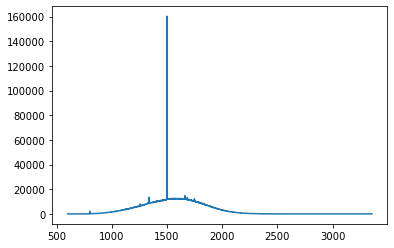

In [13]:
elo_counts.plot()

This appears to be a normal distribution, but with a spike right around 1500, the most likely cause of which is that new accounts start with 1500 elo on lichess. The normal distribution follows from the definition of elo.

<AxesSubplot:>

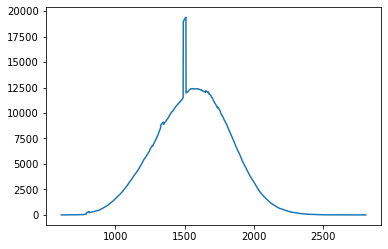

In [15]:
elo_counts.rolling(window=20, center=True).mean().plot()

Smoothing it makes the normal distribution more apparent, but reduces the severity of the spike.

<AxesSubplot:>

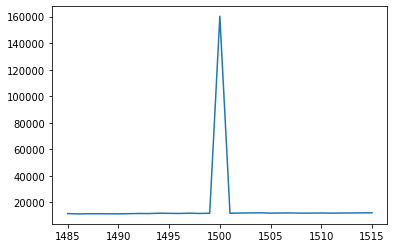

In [20]:
elo_counts[1485:1515].plot()

The spike is right at 1500, and not around it, which implies many people playing one game and not a second.

# Change to the net elo in the system?

In [21]:
df["NetElo"] = df.WhiteRatingDiff + df.BlackRatingDiff

In [22]:
df.NetElo.sum()

-7629488.0

Amongst these games, we have a net loss of elo, even though elo "should be" zero-sum. In reality there are developmental factors (new players move around faster, veterans move around slower as they settle).

<AxesSubplot:>

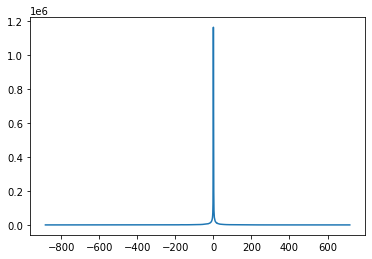

In [25]:
df.NetElo.value_counts().sort_index().plot()

Though in most cases, the net for the system will be zero.

Let's look at some of the anomalies.

In [31]:
df[df.NetElo < -600]

,Event,Site,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,TimeControl,Termination,Moves,WhiteTitle,BlackTitle,LichessId,Date,NetElo
98737,Classical,https://lichess.org/BQ5QIGv9,DevinWhoo,nik2147,White,836.0,1500.0,17.0,-619.0,C41,900+0,Time forfeit,1. e4 { [%clk 0:15:00] } e5 { [%clk 0:15:00] }...,NaN,NaN,<NA>,2017-04-27 07:55:26,-602.0
17480,Classical,https://lichess.org/Z7FyYxCG,MK-2013,Rashmithareddy,White,1050.0,1500.0,17.0,-900.0,C41,1200+15,Normal,1. e4 { [%clk 0:17:20] } e5 { [%clk 0:20:06] }...,NaN,NaN,<NA>,2020-09-23 12:30:00,-883.0
17955,Classical,https://lichess.org/se0DUwp4,nanang_7,luan_ribeiro,Black,1500.0,1223.0,-626.0,16.0,C44,180+180,Normal,1. e4 { [%eval 0.0] [%clk 0:03:00] } 1... e5 {...,NaN,NaN,<NA>,2020-09-23 23:30:38,-610.0
17996,Classical,https://lichess.org/izAtowVM,chesslover2016,pico007,White,1880.0,2425.0,16.0,-769.0,A40,900+15,Normal,1. d4 { [%clk 0:15:00] } e6 { [%clk 0:15:00] }...,NaN,NaN,<NA>,2020-09-24 01:42:57,-753.0
21604,Classical,https://lichess.org/0H22jNhH,RICEMA,dawipa,White,1160.0,1500.0,5.0,-658.0,C41,1800+8,Normal,1. e4 { [%clk 0:30:00] } e5 { [%clk 0:30:00] }...,NaN,NaN,<NA>,2020-09-28 14:45:51,-653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22096,Classical,https://lichess.org/aIcY1P6d,KirillMamaev,Lochachech,Black,1500.0,1051.0,-700.0,10.0,B01,10800+180,Normal,1. e4 { [%clk 3:00:00] } 1... d5 { [%clk 3:00:...,NaN,NaN,<NA>,2021-11-25 17:39:09,-690.0
24476,Classical,https://lichess.org/LP2XAeoy,padfootlupin,AyanshVerma2021,Black,1500.0,865.0,-700.0,39.0,D00,1500+5,Normal,1. d4 { [%eval 0.0] [%clk 0:25:00] } 1... d5 {...,NaN,NaN,<NA>,2021-11-28 10:30:15,-661.0
26038,Classical,https://lichess.org/2kH6eGqI,MP_theorema,Sarwo74_BC,White,1180.0,1500.0,6.0,-620.0,B00,900+20,Normal,1. e4 { [%clk 0:15:00] } 1... Nc6 { [%clk 0:15...,NaN,NaN,<NA>,2021-11-29 23:09:27,-614.0
26196,Classical,https://lichess.org/hoMP4oCZ,Andrey_Uralov,pumlurbuml,White,1149.0,1500.0,5.0,-677.0,C42,1800+10,Normal,1. e4 { [%clk 0:30:00] } 1... e5 { [%clk 0:30:...,NaN,NaN,<NA>,2021-11-30 06:43:04,-672.0


It looks like the anomalies are between players with 1500 ratings (new players) and another player, or otherwise have a large disparity. Manually checking some of the games in question shows those players had "provisional" ratings, ones that were not very set in stone.

<AxesSubplot:>

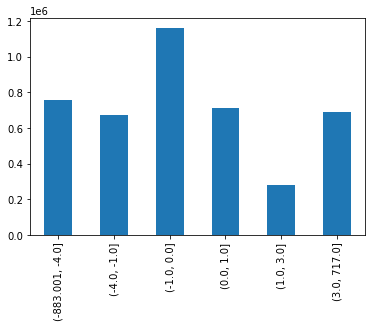

In [41]:
pd.qcut(df.NetElo, q=6).value_counts().sort_index().plot.bar()

Binning the data into six bins shows us that the most common occurance is for there to be no net change, or a net change slightly negative. Positive outcomes are less likely overall.

# Elo and Opening Frequency

In [54]:
EloOpenings = pd.DataFrame()
EloOpenings["Color"] = ["White"] * len(df) + ["Black"] * len(df)
EloOpenings["Elo"] = df.WhiteElo.append(df.BlackElo).reset_index(drop=True)
EloOpenings.Elo = pd.qcut(EloOpenings.Elo, q=4, labels=["Low", "Low-Mid", "High-Mid", "High"])
EloOpenings["Opening"] = df.ECO.append(df.ECO).reset_index(drop=True)
EloOpenings.head()

,Color,Elo,Opening
0,White,High-Mid,D04
1,White,High,C02
2,White,Low-Mid,C44
3,White,Low,B01
4,White,Low-Mid,C28


In [65]:
pd.crosstab(EloOpenings.Elo, EloOpenings.Color, normalize="columns")

Color,Black,White
Elo,,
Low,0.252689,0.248708
Low-Mid,0.249817,0.251569
High-Mid,0.249336,0.249333
High,0.248158,0.250391


In [69]:
EloOpenings.groupby(["Color", "Elo"]).agg(lambda x:x.value_counts().index[:10])

Opening
Color Elo                                                        
Black Low       ['C20', 'A00', 'D00', 'B01', 'B00', 'C40', 'A4...
      Low-Mid   ['C20', 'A00', 'D00', 'C41', 'B01', 'C00', 'B0...
      High-Mid  ['C41', 'A00', 'D00', 'C00', 'B01', 'C20', 'B2...
      High      ['C00', 'A00', 'D00', 'B01', 'B20', 'C41', 'A4...
White Low       ['C20', 'A00', 'D00', 'B01', 'B00', 'C00', 'A4...
      Low-Mid   ['C20', 'A00', 'D00', 'C41', 'B01', 'C00', 'B0...
      High-Mid  ['C41', 'C00', 'D00', 'A00', 'B01', 'B00', 'B2...
      High      ['C00', 'B01', 'C41', 'D00', 'A40', 'B00', 'A0...